In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime

matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')

## <font color='steelblue'>Going over the lifelines package</font>

### <font color='steelblue'>Kaplan-Meier and Nelson-Aalen</font>

Let's start by importing some data. We need the durations that individuals are observed for, and whether they "died" or not.

In [3]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [5]:
T = df['T']
E = df['E']

```T``` is an array of durations, ```E``` is either boolean or binary array representing whether the "death" was observed (alternatively an individual can be censored).

### Note

By default, _lifelines_ assumes all "deaths" are obsersved ( == 1)

In [7]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) # more succiently, kmf.fit(T,E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

After calling the ```fit``` method, we have access to new properties like ```survival_function_``` and methods like ```plot()```. The latter is a wrapper around Pandas internal plotting library.

* ```kmf.survival_function_```
* ```kmf.median_```
* ```kmf.plot()```

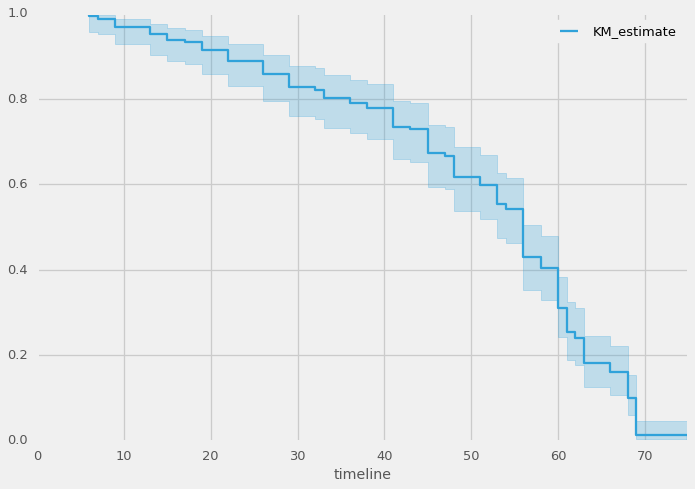

In [9]:
kmf.plot();